In [1]:
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set( style='white' )
amz = pd.read_csv('./amazon/Amazon_Unlocked_Mobile.csv')
amz.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0


In [2]:
len( set(amz['Reviews']) )

162492

In [2]:
amz.shape

(413840, 6)

In [4]:
len(set(amz["Product Name"]))

4410

In [5]:
len(set(amz["Brand Name"]))

385

In [3]:
pd.isnull(amz).sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [4]:
nanbrand = amz["Brand Name"].isnull()
for i in range(amz.shape[0]):
    if nanbrand[i]:
        amz.set_value(i, "Brand Name", 'missing')
nanprice = amz["Price"].isnull()
for i in range(amz.shape[0]):
    if nanprice[i]:
        amz.set_value(i, "Price", '-500')

In [5]:
pd.isnull(amz).sum()

Product Name        0
Brand Name          0
Price               0
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

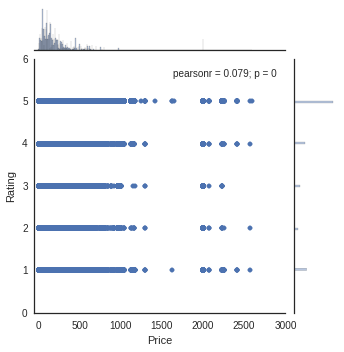

In [6]:
ax = sns.jointplot(x='Price', y='Rating', data=amz, size=5, xlim=(-50,3000) )
fig = ax.fig
fig.savefig('1-1.png', dpi=500)

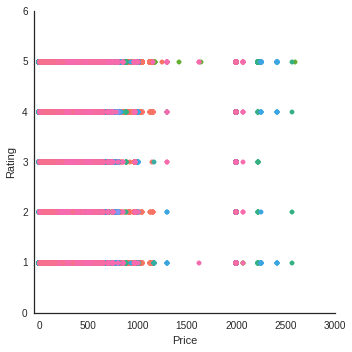

In [8]:
sns.FacetGrid(amz, hue="Brand Name", size=5, xlim=(-50,3000)) \
    .map(plt.scatter, 'Price', 'Rating') 

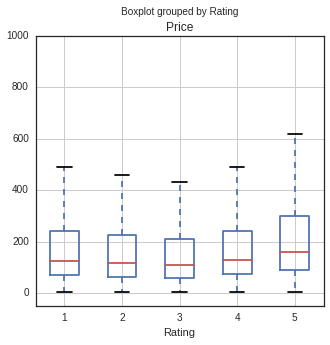

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
amz.boxplot(ax=ax, column="Price", by="Rating")
ax.set_ylim(-50,1000)
fig.savefig('1-2.png', dpi=500)

In [9]:
amz[["Price", "Rating"]].head()

,Price,Rating
0,199.99,5
1,199.99,4
2,199.99,5
3,199.99,4
4,199.99,4


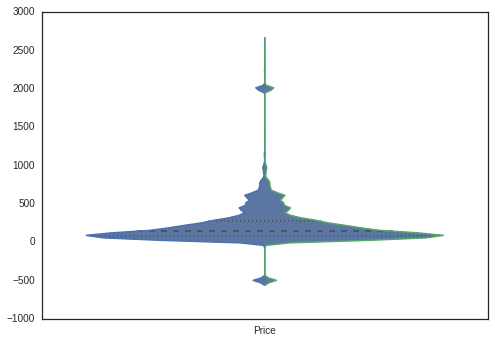

In [11]:
sns.violinplot(vals=amz[["Price"]], groupby="Rating")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd218b9acf8>]], dtype=object)

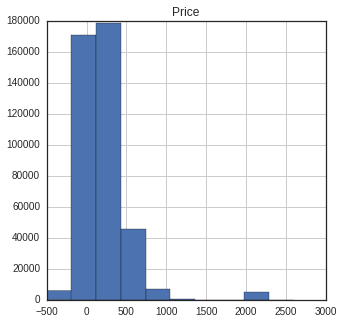

In [10]:
#negative prices: missing data
amz.hist(column="Price", figsize=(5,5))

In [14]:
review_wcnt = []
rowcnt = 0
good = 0
bad = 0
for row in amz['Reviews']:
    try:
        wcnt = len( row.split() )
        if ('good' in row) or ('great' in row) or ('perfect' in row) or ('nice' in row) or ('excellent' in row):
            good += 1
        if ('bad' in row) or ('slow' in row):
            bad += 1
    except:
        wcnt = 0
    review_wcnt.append( wcnt )
amz['Reviews Wordcounts'] = review_wcnt
amz.head()
print (good, bad)

152746 20142


In [16]:
less = 0 
for wcnt in review_wcnt:
    if wcnt < 151 and wcnt!=0:
        less += 1
print (less)

392696


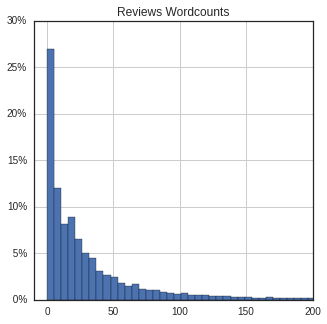

In [19]:
#negative prices: missing data
fig, ax = plt.subplots(figsize=(5,5))
amz.hist(ax=ax, column="Reviews Wordcounts", grid=True, bins=1000, \
         weights=np.ones_like(amz["Reviews Wordcounts"])/len(amz["Reviews Wordcounts"]))
ax.set_xlim(-10,200)
yvals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(y*100) for y in yvals])
fig.savefig('2-2.png', dpi=500)

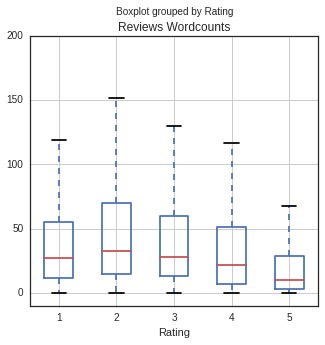

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
amz.boxplot(ax=ax, column="Reviews Wordcounts", by="Rating")
ax.set_ylim(-10,200)
fig.savefig('2-1.png', dpi=500)